<a href="https://colab.research.google.com/github/ShreeKeshavan/Sentiment_Analysis/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [ ]:
data = pd.read_csv('/content/data.csv')

In [ ]:
data.shape

(5842, 2)

In [ ]:
data.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


## **Splitting data**

In [ ]:
#method 1
X = data['Sentence']
y = data['Sentiment']

In [ ]:
#method 2
X = data.iloc[:,0]
y = data.iloc[:,1]

In [ ]:
X

0       The GeoSolutions technology will leverage Bene...
1       $ESI on lows, down $1.50 to $2.50 BK a real po...
2       For the last quarter of 2010 , Componenta 's n...
3       According to the Finnish-Russian Chamber of Co...
4       The Swedish buyout firm has sold its remaining...
                              ...                        
5837    RISING costs have forced packaging producer Hu...
5838    Nordic Walking was first used as a summer trai...
5839    According shipping company Viking Line , the E...
5840    In the building and home improvement trade , s...
5841    HELSINKI AFX - KCI Konecranes said it has won ...
Name: Sentence, Length: 5842, dtype: object

In [ ]:
y

0       positive
1       negative
2       positive
3        neutral
4        neutral
          ...   
5837    negative
5838     neutral
5839     neutral
5840     neutral
5841    positive
Name: Sentiment, Length: 5842, dtype: object

## **Checking unique values in y**

In [ ]:
#method 1
y.unique()

array(['positive', 'negative', 'neutral'], dtype=object)

In [ ]:
#method 2
y.value_counts()

neutral     3130
positive    1852
negative     860
Name: Sentiment, dtype: int64

<Axes: xlabel='Sentiment', ylabel='count'>

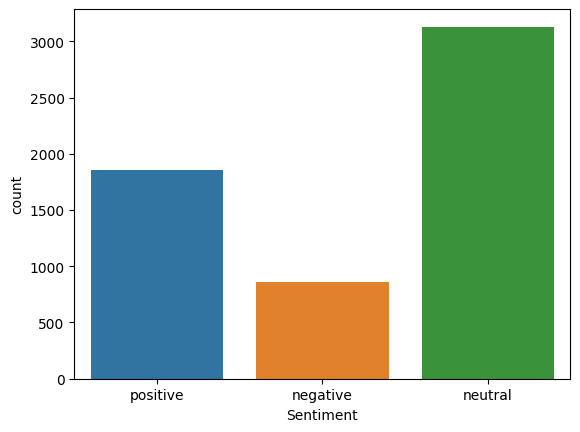

In [ ]:
#method 3
sns.countplot(x = y)

## **Preprocessing**

### **Handling  Null**

In [ ]:
y.isnull().sum()

0

### **Positive data**

In [ ]:
positive_data = data[data['Sentiment'] == 'positive'] # to extract the positive values alone

In [ ]:
positive_data

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
2,"For the last quarter of 2010 , Componenta 's n...",positive
5,$SPY wouldn't be surprised to see a green close,positive
8,Kone 's net sales rose by some 14 % year-on-ye...,positive
10,Circulation revenue has increased by 5 % in Fi...,positive
...,...,...
5819,Last month we added to our $GILD position and ...,positive
5824,`` In the newly formed company YIT Stavo the l...,positive
5825,Friends Life lifts profits 38% and hikes divi ...,positive
5836,Daily Mail parent company in talks with potent...,positive


In [ ]:
str(positive_data['Sentence']) # to convert all the sentence together then only we can able to create word cloud

"0       The GeoSolutions technology will leverage Bene...\n2       For the last quarter of 2010 , Componenta 's n...\n5         $SPY wouldn't be surprised to see a green close\n8       Kone 's net sales rose by some 14 % year-on-ye...\n10      Circulation revenue has increased by 5 % in Fi...\n                              ...                        \n5819    Last month we added to our $GILD position and ...\n5824    `` In the newly formed company YIT Stavo the l...\n5825    Friends Life lifts profits 38% and hikes divi ...\n5836    Daily Mail parent company in talks with potent...\n5841    HELSINKI AFX - KCI Konecranes said it has won ...\nName: Sentence, Length: 1852, dtype: object"

(-0.5, 399.5, 199.5, -0.5)

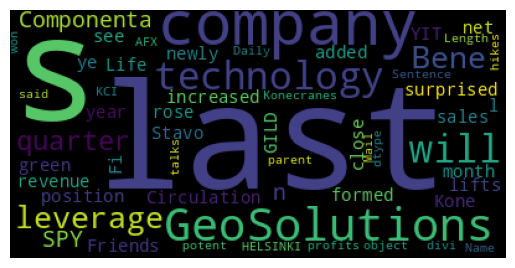

In [ ]:
# Word Cloud

wc = WordCloud().generate(str(positive_data['Sentence'])) #to generate word cloud on which data
plt.imshow(wc) #to generate images using matplotlib
plt.axis('off') #to off the axis labels

### **Negative data**

In [ ]:
negative_data = data[data['Sentiment'] == 'negative'] # to extract the negative values alone

In [ ]:
positive_data

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
2,"For the last quarter of 2010 , Componenta 's n...",positive
5,$SPY wouldn't be surprised to see a green close,positive
8,Kone 's net sales rose by some 14 % year-on-ye...,positive
10,Circulation revenue has increased by 5 % in Fi...,positive
...,...,...
5819,Last month we added to our $GILD position and ...,positive
5824,`` In the newly formed company YIT Stavo the l...,positive
5825,Friends Life lifts profits 38% and hikes divi ...,positive
5836,Daily Mail parent company in talks with potent...,positive


In [ ]:
str(negative_data['Sentence']) # to convert all the sentence together then only we can able to create word cloud

"1       $ESI on lows, down $1.50 to $2.50 BK a real po...\n6       Shell's $70 Billion BG Deal Meets Shareholder ...\n7       SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANG...\n11      $SAP Q1 disappoints as #software licenses down...\n39      $AAPL afternoon selloff as usual will be bruta...\n                              ...                        \n5829    $SBUX down PM, from $DB downgrade.. PT cut fro...\n5831    Finnish developer and manufacturer of mobile p...\n5832    Operating profit fell to EUR 38.1 mn from EUR ...\n5835    HSBC Says Unit to Book $585 Million Charge on ...\n5837    RISING costs have forced packaging producer Hu...\nName: Sentence, Length: 860, dtype: object"

(-0.5, 399.5, 199.5, -0.5)

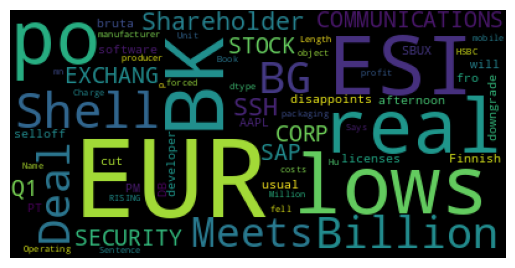

In [ ]:
# Word Cloud

wc = WordCloud().generate(str(negative_data['Sentence'])) #to generate word cloud on which data
plt.imshow(wc) #to generate images using matplotlib
plt.axis('off') #to off the axis labels

### **Neutral data**

In [ ]:
neutral_data = data[data['Sentiment'] == 'neutral'] # to extract the neutral values alone

In [ ]:
neutral_data

,Sentence,Sentiment
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
9,The Stockmann department store will have a tot...,neutral
13,Viking Line has canceled some services .,neutral
14,Ahlstrom Corporation STOCK EXCHANGE ANNOUNCEME...,neutral
...,...,...
5833,"In 2008 , Kemira recorded revenue of approxima...",neutral
5834,Investments in product development stood at 6....,neutral
5838,Nordic Walking was first used as a summer trai...,neutral
5839,"According shipping company Viking Line , the E...",neutral


In [ ]:
str(neutral_data['Sentence']) # to convert all the sentence together then only we can able to create word cloud

'3       According to the Finnish-Russian Chamber of Co...\n4       The Swedish buyout firm has sold its remaining...\n9       The Stockmann department store will have a tot...\n13               Viking Line has canceled some services .\n14      Ahlstrom Corporation STOCK EXCHANGE ANNOUNCEME...\n                              ...                        \n5833    In 2008 , Kemira recorded revenue of approxima...\n5834    Investments in product development stood at 6....\n5838    Nordic Walking was first used as a summer trai...\n5839    According shipping company Viking Line , the E...\n5840    In the building and home improvement trade , s...\nName: Sentence, Length: 3130, dtype: object'

(-0.5, 399.5, 199.5, -0.5)

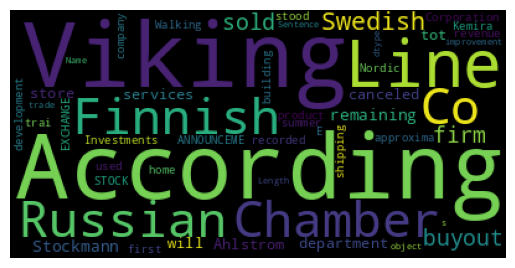

In [ ]:
# Word Cloud

wc = WordCloud().generate(str(neutral_data['Sentence'])) #to generate word cloud on which data
plt.imshow(wc) #to generate images using matplotlib
plt.axis('off') #to off the axis labels

## **Vectorizer**

In [ ]:
vec = CountVectorizer(stop_words = 'english')
X = vec.fit_transform(X)
X

<5842x11126 sparse matrix of type '<class 'numpy.int64'>'
	with 65768 stored elements in Compressed Sparse Row format>

In [ ]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
vec.vocabulary_

{'geosolutions': 4574,
 'technology': 9925,
 'leverage': 6016,
 'benefon': 1650,
 'gps': 4666,
 'solutions': 9322,
 'providing': 7959,
 'location': 6142,
 'based': 1569,
 'search': 8905,
 'communities': 2487,
 'platform': 7623,
 'relevant': 8333,
 'multimedia': 6765,
 'content': 2657,
 'new': 6890,
 'powerful': 7750,
 'commercial': 2465,
 'model': 6652,
 'esi': 3700,
 'lows': 6208,
 '50': 532,
 'bk': 1726,
 'real': 8179,
 'possibility': 7724,
 'quarter': 8048,
 '2010': 255,
 'componenta': 2546,
 'net': 6876,
 'sales': 8758,
 'doubled': 3303,
 'eur131m': 3758,
 'eur76m': 3876,
 'period': 7482,
 'year': 11021,
 'earlier': 3420,
 'moved': 6734,
 'zero': 11070,
 'pre': 7768,
 'tax': 9900,
 'profit': 7884,
 'loss': 6188,
 'eur7m': 3877,
 'according': 884,
 'finnish': 4245,
 'russian': 8696,
 'chamber': 2230,
 'commerce': 2464,
 'major': 6302,
 'construction': 2640,
 'companies': 2490,
 'finland': 4240,
 'operating': 7149,
 'russia': 8695,
 'swedish': 9774,
 'buyout': 2001,
 'firm': 4255,
 '

In [ ]:
len(vec.vocabulary_) # to get len of all vocabulary

11126

In [ ]:
vec.vocabulary_['presence'] # to get no of vocabulary of particalar word

7797

## **Splitting**

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=5)

## **Training model**

In [ ]:
mnb = MultinomialNB()
mnb.fit(X_train,y_train)

MultinomialNB()

In [ ]:
mnb.score(X_train,y_train)

0.8557406984706688

In [ ]:
mnb.score(X_test,y_test)

0.6878850102669405

In [ ]:
mnb.classes_ #the sequence of confussion matrix

array(['negative', 'neutral', 'positive'], dtype='<U8')

In [ ]:
y_pred = mnb.predict(X_test)
cm = confusion_matrix(y_pred,y_test)
cm

array([[ 81,  89,  26],
       [ 86, 605, 127],
       [ 51,  77, 319]])

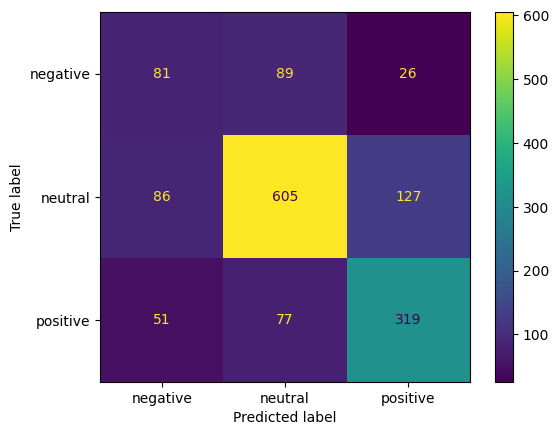

In [ ]:
ConfusionMatrixDisplay(cm, display_labels = mnb.classes_ ).plot()

In [ ]:
sample = 'The compant XYZ did not perform well in the first quater. Its sales have been declining.'
sample = vec.transform([sample])
mnb.predict(sample)

array(['neutral'], dtype='<U8')

In [ ]:
sample1 = 'The growth rate of the company has been positive. Its shares price is also increasing. Customers like the companys production'
sample1 = vec.transform([sample1])
mnb.predict(sample1)

array(['positive'], dtype='<U8')

### **This model can able to predict the positive sentiment and struggles to identify the negative data because has less datas with negative sentiment**